##### The "Tasks" here are from the 'Monte Carlo and Jet Tutorial' developed by Samuel Meehan which can be found below 
###### https://github.com/smeehan12/ToyMCJetsTutorial/blob/master/Note/ToyMCJetTutorial.pdf

### Task 1: Practice writing a program in Python that generates random numbers.  
#### In the first case, write a program to generate 1000 random numbers distributed uniformly between [0,1] and make a histogram of these numbers. 
#### In the second case, write a program that distributes the random numbers between [5,15] and makes a histogram. Remember, it is only allowed to use the random.random() functionality in Python. 
#### As a hint, think about how to make the minimum and maximum of the [0,1] distribution into the minimum and maximum of the [5,15] distribution.

In [1]:
import random
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
onek = []
for i in range (0,100000): #using 100,000 numbers instead because it's easier to see through the sample noise 
    n = random.random()
    onek.append(n)

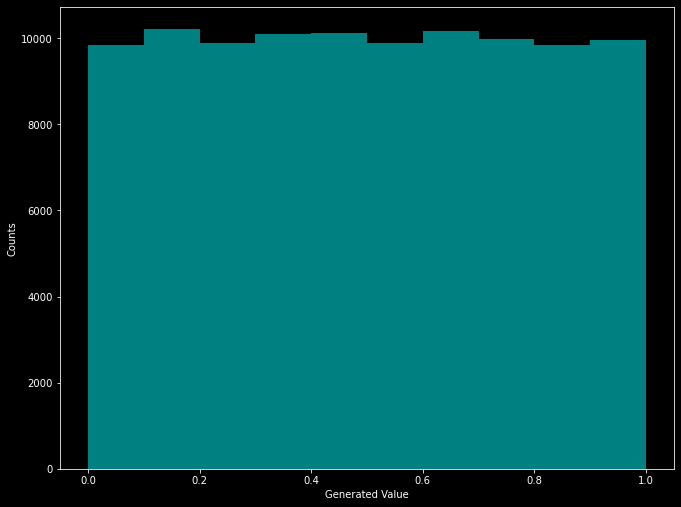

In [3]:
plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
plt.hist(onek, 10, facecolor='teal') #with 10 bins I expect to see about 10,000 counts per bin
plt.xlabel("Generated Value")
plt.ylabel("Counts")
plt.show()

In [4]:
quince = []
for i in range (0,100000): #again, using 100,000 points in order to see the uniform distrution
    n = random.uniform(5,15)
    quince.append(n)

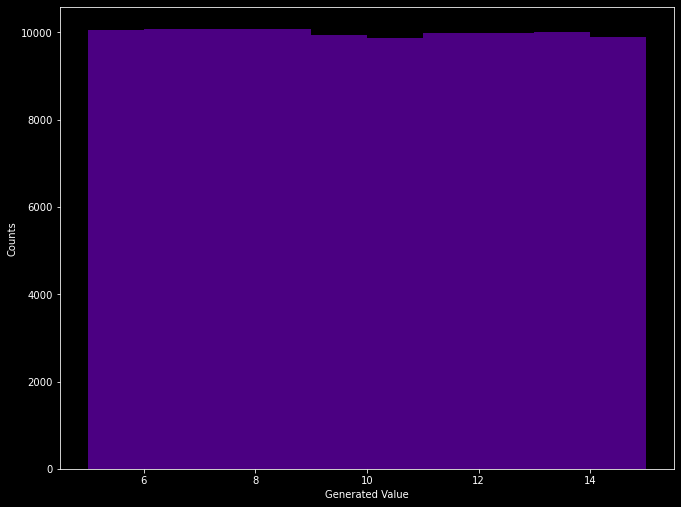

In [5]:
x = quince
plt.figure(figsize=(11,8.5))
plt.hist(x, 10, facecolor='indigo') #with 10 bins I expect 10,000 counts per bin
plt.xlabel("Generated Value")
plt.ylabel("Counts")
plt.show()

### Task 2: Practice writing a program in Python that generates random numbers, distributed according to a Gaussian distribution with a mean μ of 5 and a width σ of 2 in the range of [0,10].

In [6]:
gdist = []
for i in range (0,10000): #using 10,000 points instead in order to get a 'better looking' distribution
    n = round(random.gauss(5,2), 5)
    if 10 > n > 0:
        gdist.append(n)
    else:
       pass

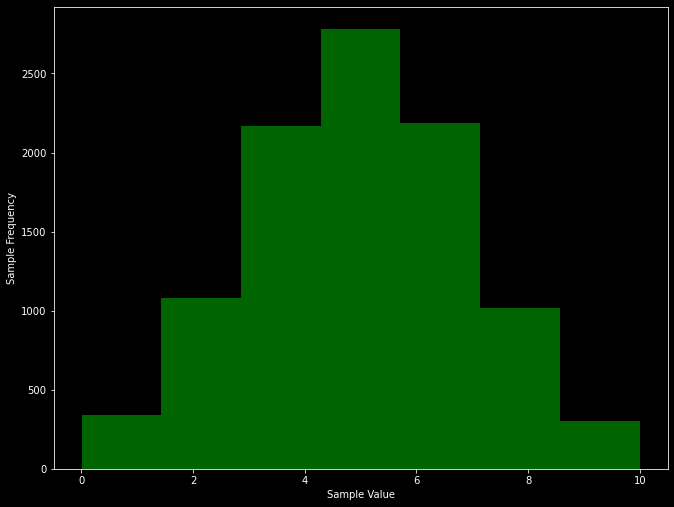

In [7]:
#histogram, should be a gaussian distribution
plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
plt.hist(gdist, 7, facecolor='darkgreen')
plt.xlabel("Sample Value")
plt.ylabel("Sample Frequency")
plt.show()

#### The accept-reject method is a very powerful. So much so that we can use it to numerically evaluate the value of π. 
#### To do this, imagine that you have a circle of diameter 1 inscribed within a squareof side length 1 (you may want to draw a picture of this). 
#### Now, using and accept-reject method, generate 1000 random points falling anywhere within the square shaped region. Determine what fraction of these fall within the circle. These two numbers, the total generated points, and those falling within the accepted region of the circle, can directly be related to the area of the square and the circle
#### $A_{square}=d*d=N_{total points}$, and $A_{circle}=\pi (\frac{d}{2})^{2} = N_{accepted points}$.
#### Taking the ratio of these two equations gives,
#### $\longrightarrow\dfrac{\pi\frac{d^2}{4}}{d^2}=\dfrac{N_{accepted points}}{N_{total points}}$, $\Longrightarrow\pi=4*\dfrac{N_{accepted points}}{N_{total points}}$

### Task 3: Write a short program that calculates π using this method.

In [8]:
#generating the thousand random points interior to the unit square
pix = []
piy = []
for i in range (0,500000): #loop generates the random x coordinate
    pix.append(random.random())
for i in range (0,500000): #loop generates the random y coordinate
    piy.append(random.random())
#so 500,000 total points, N = 500,000

''

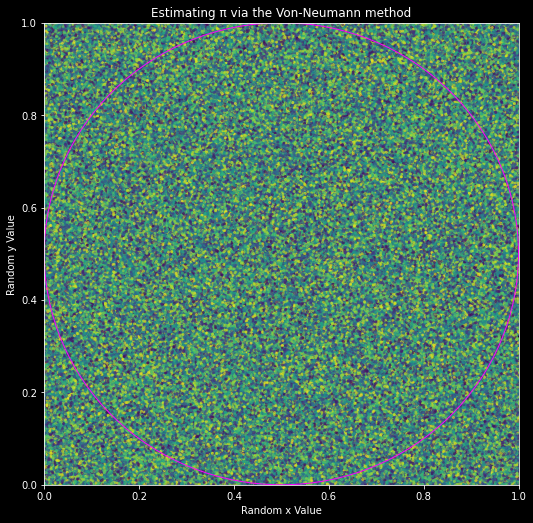

In [9]:
from matplotlib.patches import Circle #needed for circle
import numpy as np
circ = plt.Circle((0.5,0.5), radius=0.5, color='fuchsia', fill=False)
fig, ax = plt.subplots(figsize=(8.5,8.5)) #necessary to show the circle with the scatter plot, also sets the plot's square dimensions
ax.add_artist(circ) #plots the circle ontop the scatter plot
colors = np.random.rand(500000) #generates different colors for the points
plt.scatter(pix, piy, s=4, c=colors, alpha=0.5) #alpha adds the transparency, s defines the points size
plt.xlabel("Random x Value")
plt.ylabel("Random y Value")
plt.title("Estimating π via the Von-Neumann method")
plt.axis([0,1,0,1])
;

In [10]:
from progressbar import ProgressBar #have to install the package with pip
pbar = ProgressBar()
gx = [] #creating lists that will be filled with the 'good' x values
gy = [] #and the the 'good' y values
for i in pbar(range (0,500000)): #accept-reject portion in the form of an if statement
    xv = list(pix)[i] #picks out the ith x value in px
    yv = list(piy)[i]
    rdist  = math.sqrt((xv-0.5)**2 + (yv-0.5)**2)
    if rdist <= 0.5:
        gx.append(xv)
        gy.append(yv)
    else:
        pass
    #### I would really like to make this for loop more 'efficient', in other words, have the ability to compute one million random samples in a timely manner (yet to be done on my box, attempted once lol)

100% |########################################################################|


''

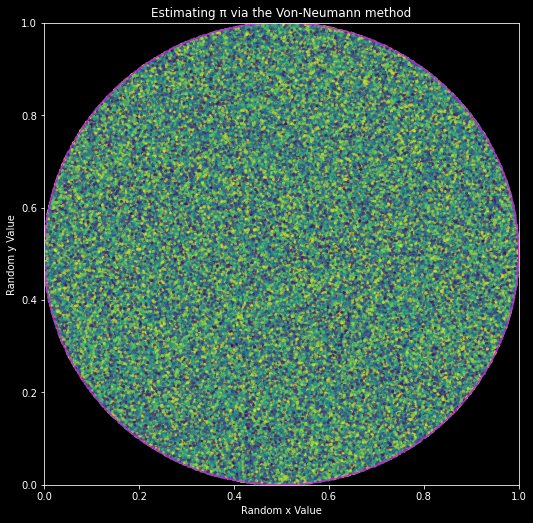

In [11]:
circ = plt.Circle((0.5,0.5), radius=0.5, color='fuchsia', fill=False) #same circle
fig, ax = plt.subplots(figsize=(8.5,8.5)) #necessary to show the circle with the scatter plot, also sets the plot's square dimensions
ax.add_artist(circ) #plots the circle ontop the scatter plot
colors = np.random.rand(len(gx)) #generates different colors for the points, specfically one for every accepted point
plt.scatter(gx, gy, s=4, c=colors, alpha=0.5) #alpha adds the transparency
plt.xlabel("Random x Value")
plt.ylabel("Random y Value")
plt.title("Estimating π via the Von-Neumann method")
plt.axis([0,1,0,1])
;

In [12]:
epi=4*(len(gx)/500000)
print("So, using this accept-reject method, my estimate for pi is {}.".format(epi)) #3.1456 was the best so far, output wasn't saved though.

So, using this accept-reject method, my estimate for pi is 3.142048.


### Task 4: Reason for yourself, conceptually, how the generation of a uniformly distributed set of events on the y axis is correctly translated to a set of events distributed according to the PDF. Specifically why is the translation function chosen to be the CDF? Is it possible to choose another functional form and achieve the same result?

#### Starting with the set of events being uniformly distributed along the y-axis, then using the inverse of the CDF to translate each of these points to an x-value depending on the point on the CDF it intersects with, at that point, the corresponding x-value becomes the corresponding event on the x-axis (exactly like Fig. 5b). The shape of the CDF is what allows for the generation of x events that are distributed in the same way as a PDF would, to be specific the the middle of the function has a relatively vertical shape which allows for far more inersections with a uniform set of y events and thereby creating a majority of the generated x-values near the middle; by the same token, the relatively horizontal shape of the CDF occurs at the edges which forces fewer intersections in these regions which results in fewer generated x-values in these regions which is to be expected."
$\Huge\checkmark$

### Task 5: Practice writing a program in Python that generates random numbers, distributed according to a Gaussian distribution with a mean $\mu$ of 5 and a width $\sigma$ of 2 in the range of [0,10].

#### Generic Gaussian; 
#### $g(x)={\dfrac{1}{\sigma{\sqrt{2\pi}}}}e^{-{\dfrac{1}{2}}\left({\dfrac{x-\mu}{\sigma }}\right)^{2}}$

#### The Generic Gaussian can be simplified to just $f(x)={\dfrac{1}{{\sqrt{2\pi}}}}e^{-{\dfrac{x^2}{2}}}$, from here we can derive the neccesary function for performing the inverse transform on this particular $f(x)$, and then we can relate it to the Generic Gaussian with $g(x)={\dfrac{1}{\sigma}}f\left({\dfrac{x-\mu}{\sigma}}\right)$.

#### Deriving the CDF of a Gaussian; 
#### ${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{\dfrac{-t^{2}}{2}}\,dt}\Longrightarrow{\displaystyle \Phi (x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]}$ 

#### Deriving the Inverse CDF of a Gaussian; 
#### $\Phi\left(x\right)=y=\frac{1}{2}+\frac{1}{2}\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)$ $\Longrightarrow x=\sqrt{2}\operatorname{inverf}\left(2y-1\right)$

#### Next Step: Approximate the Inverse Error Function... Recalling the Taylor Expansion Series; 
#### ${\displaystyle \sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}(x-a)^{n}}={\displaystyle f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots}$

#### The function $f(x)=\operatorname{inverf}(x)$ is used to elucidate the function $h(x)=\sqrt{2}\operatorname{inverf}\left(2x-1\right)$. This function will be evaluated about $a=0$.

#### We now require the derivatives of the Inverse Error Function... 
#### By exploiting the chain rule in differentiating $\operatorname{erf}\left(\operatorname{erfinv}(x)\right)=x$ I can get the derivative of $\operatorname{erfinv}(x)$.

#### Begining with $f(x)=\operatorname{inverf}(x)$ 

#### $\frac{d}{dx}\operatorname{erf}\left(\operatorname{erfinv}(x)\right)=\left(\frac{d}{dz
}\operatorname{erf}z|^{z=\operatorname{erfinv}(x)}\right)\frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=1$ 
#### $\Longrightarrow \left(\frac{2}{\sqrt{\pi}}e^{-z^2}|^{z=\operatorname{erfinv}(x)}\right)\frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=1$ 
#### $\longrightarrow \left(\frac{2}{\sqrt{\pi}}e^{-\operatorname{erfinv}(x)^2}\right)\frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=1$

#### Thus, $f'(x)\Longrightarrow \frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=\dfrac{\sqrt{\pi}}{2}\left(e^{\operatorname{erfinv}(x)^2}\right)$; and,  $f'(a)=\dfrac{\sqrt{\pi}}{2}$.

#### The first derivative is $f'(x)=\dfrac{\sqrt{\pi}}{2}\left(e^{f(x)^2}\right)$.

#### The second derivative is then $f''(x)=\dfrac{\sqrt{\pi}}{2}\left(2f(x)f'(x)\right)\left(e^{f(x)^2}\right)=2f'(x)^2f(x)$.

#### The third derivative is then $f'''(x)=2f'(x)^3+4f''(x)f'(x)f(x)=2f'(x)^3+8f'(x)^3f(x)^2 \Longrightarrow f'(x)^3\left(2+8f(x)^2\right)$.

#### There appears to be a pattern in the successive derivatives of $f(x)$, namely with every succesive derivative there is a polynomial factor of increased power by one and another other factor that's the first derivative of $f(x)$ to the same power as the specific derivative index. I'll prove the pattern by deriving the $n^{th}$ derivative...

#### The $n^{th}$ derivative is the $f^n(x)=f'(x)^nP(x)$
#### The $n+1^{th}$ derivative is then $f^{n+1}(x)=nf'(x)^{n-1}f''(x)P(x)+f'(x)^{n+1}P'(x)$ substituting in $f''(x)$,
#### $\longrightarrow f^{n+1}(x)=nf'(x)^{n-1}2f'(x)^2f(x)P(x)+f'(x)^{n+1}P'(x)$ simplifying,
#### $\longrightarrow f^{n+1}(x)=2nP(x)f(x)f'(x)^{n+1}+P'(x)f'(x)^{n+1}=f'(x)^{n+1}\left(2nP(x)f(x)+P'(x)\right)$ QED.

#### The formula for every succesive derivative $f^{n+1}(x)$ has a specific Polynomial factor, $\left(2nP(x)f(x)+P'(x)\right)$, the $P(x)$ comes from the previous derivative. I can use this to derive the fourth, fifth, and as many other higher-order derivatives as is necessary.
#### This specific Polynomial factor, $\left(2nP(x)f(x)+P'(x)\right)$, is something I can define with Python code; with the specific Polynomial term and the first derivative I can completely describe the formula for every succesive derivative in Python code.

In [13]:
#The specific Polynomial factor would be best expressed as a function to my understanding...
#P will be a list that contains the numerical factors that correspond the specific coefficients to each term within the specific Polynomial.
#The list P will have each entry be the value corresponding coefficient to the term whose power matches that of the entries index. 
# Example P lists for the second and third derivatives.
P1 = [1] #Trivial.
P2 = [0, 2] #For example.
P3 = [2, 0, 8] #For example.

#Below is the function that would compute the specific Polynomial factor within the specific higher order derivatives.
def spef_P(P, n):
    Pf = [0] + P #The reason for this is the P(x)f(x) shifts the coefficients to terms with power one greater, leaving no constant terms.
    two_nPf = [] #Creating a new list that will be filled with the 2nPf specific term coefficients.
    for i in range(len(Pf)):
        x = 2*n*Pf[i] #Each entry will be muiltiplied by the constant 2n
        two_nPf.append(x) #Appending each new entry to the new list
    dPdx = list(enumerate(P[1:], 1)) #creates a list similar to P except that each entry now contains a list with two element, the first entry of the sublists is the power of the term the coefficient corresponds to
    P_prime = [] #Creating a new list that will be filled with the derivative's specific term coefficients
    for i in range(len(dPdx)):
        x = dPdx[i][0]*dPdx[i][1]
        P_prime.append(x)
    s_P = [] #Creating a new list that will store the specific coefficients to each term
    for i in range(len(two_nPf)):
        try:
            x = two_nPf[i] + P_prime[i] #Combines terms, thereby simplifying the specific Polynomial
            s_P.append(x)
        except:
            s_P.append(two_nPf[i]) #The derivative of P will be a shorter list than the 2nPf factor so this is necessary to have the loop work and to preserve the higher order terms
    return s_P

#### After arriving at this function that computes the higher-order derivatives of $f(x)=\operatorname{erfinv}(x)$, another insight can simplify this Taylor Series Expansion; since we are evaluating these derivatives at $a=0$, we know all terms with a non-zero power will vanish in the specfic Polynomial factor and this simplifies the series tremendously. The implication is only the constant terms of the specific Polynomial will 'survive' being evaluated at $a$.

#### Denoting the constant terms that accompany each factor of $(x-a)$ within the series as the Taylor Coefficient, for example this would be ${\frac{f'(a)}{1!}}$ for the $(x-a)$ term; this example Taylor Coefficient would become $\frac{\sqrt{\pi}}{2}$.
#### ${\displaystyle \sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}(x-a)^{n}}={\displaystyle f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots}$

#### These Taylor coefficients can be defined with Python code; the function is essentially the product of the Polynomial's constant term and $f'(a=0)$ divided by $n!$.

In [14]:
### Below is my attempt at a script that would compute the appropriate Taylor coefficients all the while updating the specific Polynomial being used with function I created earlier ### Not yet working !!!
t_coeff = [0, math.sqrt(math.pi)/2] #The first two Taylor coefficients are known, the constant term is zero and as stated just above we know the n=1 coefficient would be root pi/2
fprime_a = math.sqrt(math.pi/2) #The first derivative evaluated at a=0
P = P2 #Starting with the second Taylor coefficient so we can get the third, the fourth, and so on
#Finding the next eight Taylor coefficients for the terms x^2 to x^9, I figure this is enough precision
for i in range(2,10):
    P_c = P[0] #Picking out the constant term for the specific Polynomial
    t_c = ((fprime_a**i)*P_c)/(math.factorial(i)) #This computes the next Taylor coefficient
    P = spef_P(P, i) #This redefines P as the next specific Polynomial factor, allowing for the loop to correctly approach the next computation
    t_coeff.append(t_c)

In [15]:
#Hard coded constants for the specific Polynomials
P1c = P1[0]
P2c = P2[0]
P3c = P3[0]
P4 = spef_P(P3,3)
P4c = P4[0]
P5 = spef_P(P4,4)
P5c = P5[0]
#Hard coding the Taylor Series Expansion
t_coeff = [0, math.sqrt(math.pi)/2] #The first two Taylor coefficients are known, the constant term is zero and as stated just above we know the n=1 coefficient would be root pi/2
fprime_a = math.sqrt(math.pi)/2 #The first derivative evaluated at a=0
t_c2 = ((fprime_a)**2 * P2c)/math.factorial(2) 
t_coeff.append(t_c2)
t_c3 = ((fprime_a)**3 * P3c)/math.factorial(3) 
t_coeff.append(t_c3)
t_c4 = ((fprime_a)**4 * P4c)/math.factorial(4)
t_coeff.append(t_c4)
t_c5 = ((fprime_a)**5 * P5c)/math.factorial(5)
t_coeff.append(t_c5)
t_coeff #checking the entry values for the coefficients list

[0, 0.8862269254527579, 0.0, 0.2320136665346544, 0.0, 0.1275561753055979]

In [16]:
t5y = [] #this is the uniformly distributed y event list
t5mu = 5
t5sigma = 2

for i in range (0,100000):
    n = random.uniform(0,1)
    t5y.append(n)

t5x = [] #this is the list for the x events that are obtained via the inverse transform of the y events
for i in range (0,100000):
    y = t5y[i]
    x = math.sqrt(2) * (t_coeff[0] + t_coeff[1]*(2*y-1) + t_coeff[2]*(2*y-1)**2 + t_coeff[3]*(2*y-1)**3 + t_coeff[4]*(2*y-1)**4 + t_coeff[5]*(2*y-1)**5)
    t5x.append(x)

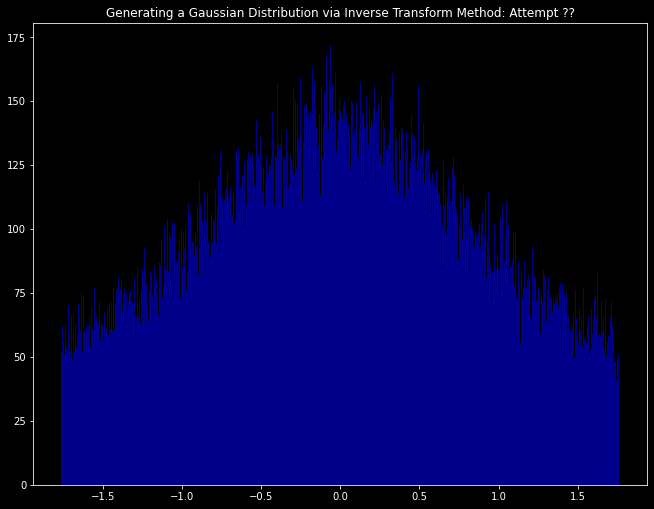

In [17]:
#histogram, should be gaussian
fig = plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
ax = fig.add_subplot(111)
ax.hist(t5x, 1000, facecolor='darkblue')
plt.title("Generating a Gaussian Distribution via Inverse Transform Method: Attempt ??")
#fig.tight_layout()
plt.show()

### Task 6: Practice writing a program in that generates random numbers, distributed according to a falling distribution of the form $e^{−x}$ in the range [0,5]. 
#### After doing this, generate the same distribution using the accept-reject method and determine the efficiency of the generation, defined as the fraction of accepted x values with respect to the total generated x values. How does this efficiency compare t the accept-reject method and the inverse transform method?

In [18]:
t6y = [] #this is the uniformly distributed y event list
for i in range (0,100000): #again, using 100,000 points in order to see the uniform distrution
    n = random.uniform(0,1)
    t6y.append(n)
t6x = [] #this is the list for the x events that are derived through the inverse transformation
for i in range (0,100000):
    y = t6y[i]
    x = -math.log(y)
    t6x.append(x)

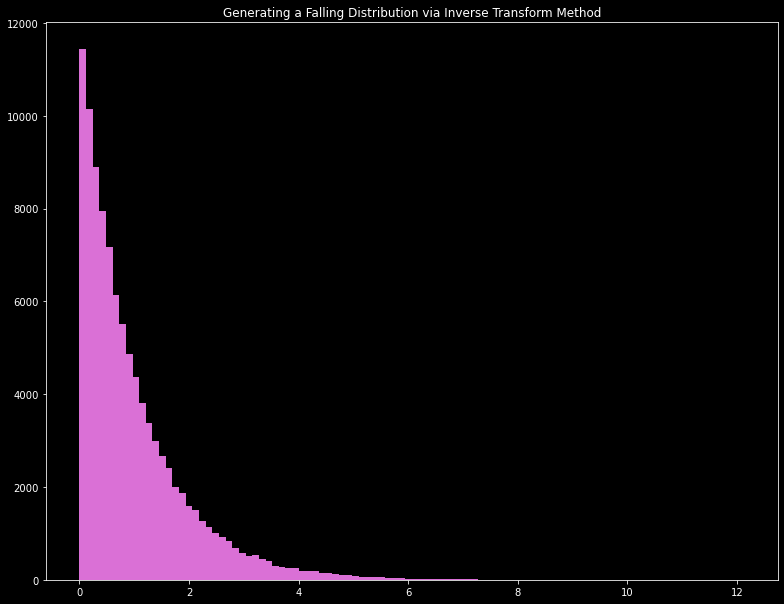

In [19]:
#histogram, should be the falling distribution exp(-x)
fig = plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
ax = fig.add_subplot(111)
ax.hist(t6x, 100, facecolor='orchid')
plt.title("Generating a Falling Distribution via Inverse Transform Method")
fig.tight_layout()
plt.show()

In [20]:
#attempting the above via the Von-Neumann method #not finished
t6a = [] #generating the random x coordinate samples
t6b = [] #generating the random y coordinate samples
for i in range (0,100000): #again, using 100,000 points in order to see the uniform distrution
    n = random.uniform(0,1)
    t6.append(n)

NameError: name 't6' is not defined